# Data description

`telcom.csv` consinsts of:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – client id<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – how long does client use company's service<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – telephone service (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – (number)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – (number)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – (Yes or No)<br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle
from xgboost import XGBClassifier

In [2]:
def hist_plot(df, parameter, n_bins):
    df[parameter].hist(bins=n_bins)
    plt.title(f'Parameter {parameter}')
    plt.show()

In [3]:
def category_plot(df, parameter):
    plt.figure(figsize = (10,8))
    sns.set(style = 'whitegrid')
    sns.countplot(df[parameter], hue = df.Churn)

# 1. Data preparation and high level analysis

In [79]:
dataframe = pd.read_csv('telcom.csv')
dataframe = dataframe.drop(columns=['customerID'], axis=1)
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
dataframe.TotalCharges.replace('', np.nan)

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [5]:
dataframe.shape

(7043, 20)

There are 7043 objects in dataframe, 19 features and target value Churn.

Get data types in the dataframe

In [6]:
dataframe.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Gender feature

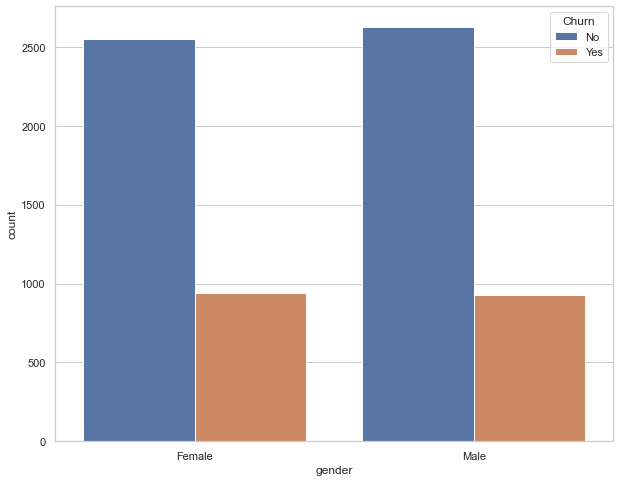

In [7]:
category_plot(dataframe, 'gender')

In [8]:
dataframe.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Noted that male clients is 67 more than female clients. In general it could be said that ditribution based on gender is almost equal.

#### SeniorCitizen feature

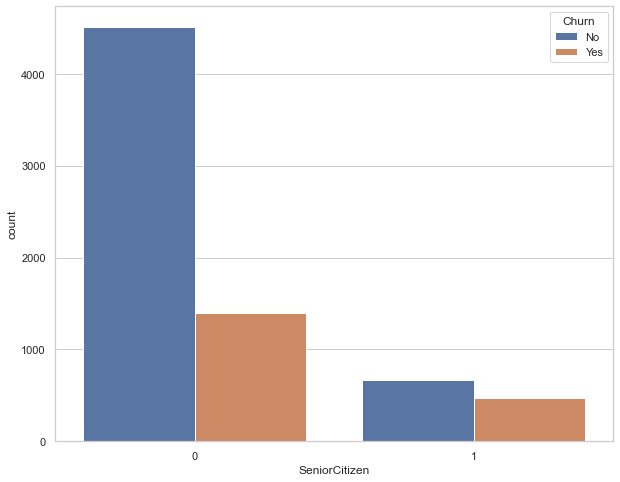

In [9]:
category_plot(dataframe, 'SeniorCitizen')

In [10]:
dataframe.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Senior citizen fraction is equal to 19%.

#### Partner feature

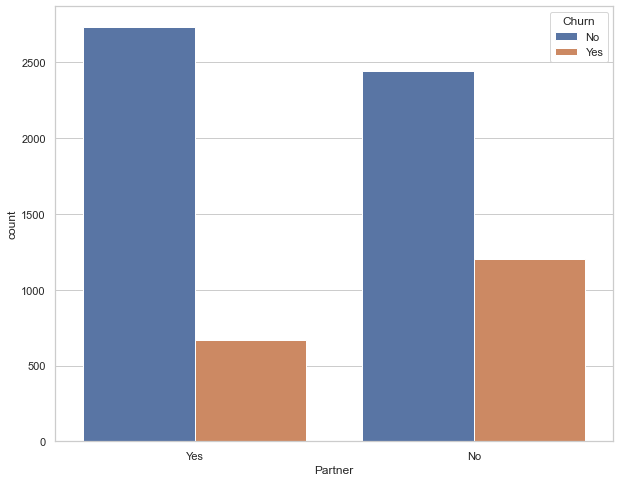

In [11]:
category_plot(dataframe, 'Partner')

In [12]:
dataframe.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Number of clients without partners is 178 more than clients with.

#### Dependents features

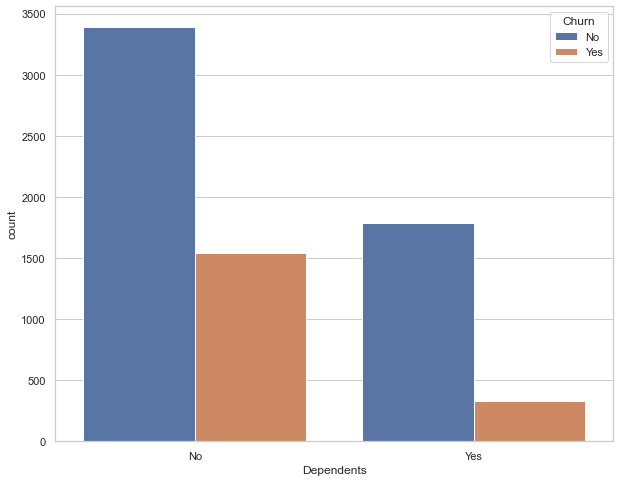

In [13]:
category_plot(dataframe, 'Dependents')

In [14]:
dataframe.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

70% of clients have not dependents and churn rate for them is high.

#### Tenure feature

In [15]:
dataframe.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

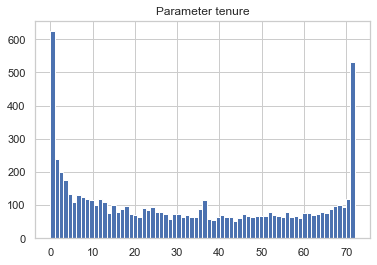

In [16]:
hist_plot(dataframe, 'tenure', 70)

Bimodal distribution shows that company has significant amount of regular clients (more than 4 years), but also has high number of new clients.

#### PhoneService feature

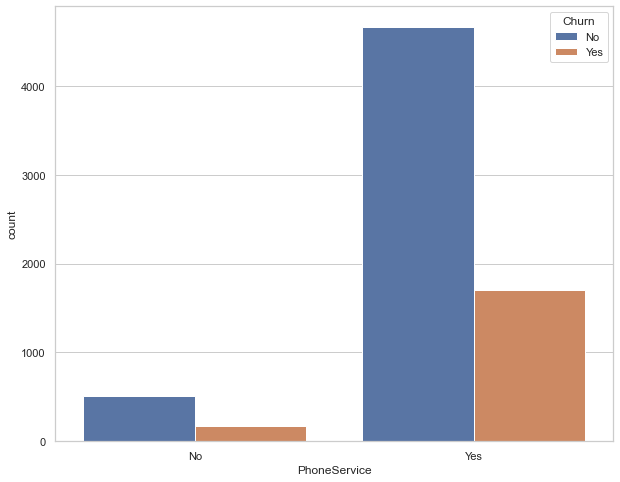

In [17]:
category_plot(dataframe, 'PhoneService')

In [18]:
dataframe.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

About 90% of clients have phone service activated.

#### MultipleLines feature

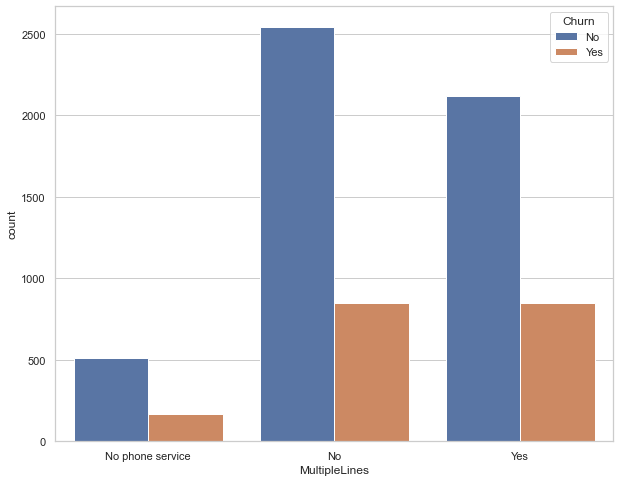

In [19]:
category_plot(dataframe, 'MultipleLines')

In [20]:
dataframe.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Number of clients with miltiple lines activated (2548) is almost equal to number of clients without activation of this feature (2848).

#### InternetService feature

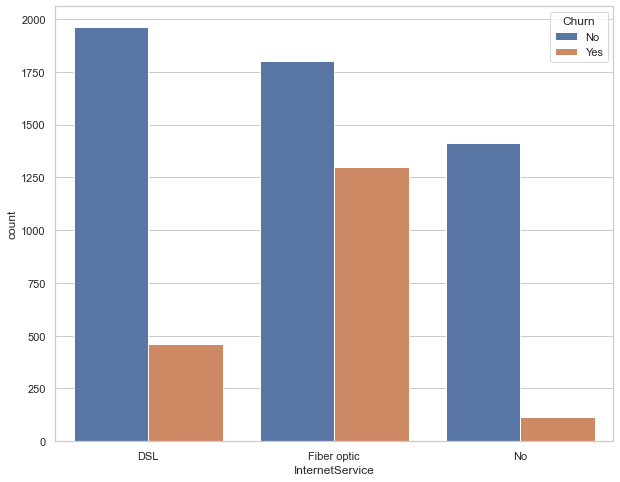

In [21]:
category_plot(dataframe, 'InternetService')

In [22]:
dataframe.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

44% of clients use Fiber optic and 35% DSL. High churn rate for clients with Fibre optic.

#### OnlineSecurity feature

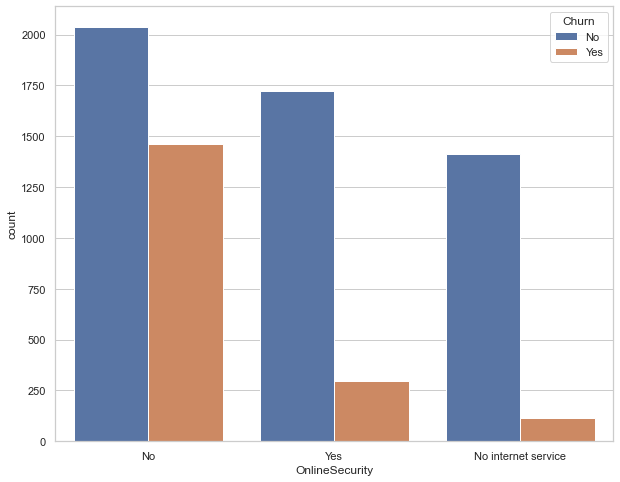

In [23]:
category_plot(dataframe, 'OnlineSecurity')

In [24]:
dataframe.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

50% of clients have not activated online security feature, churn rate is also high.

#### OnlineBackup feature

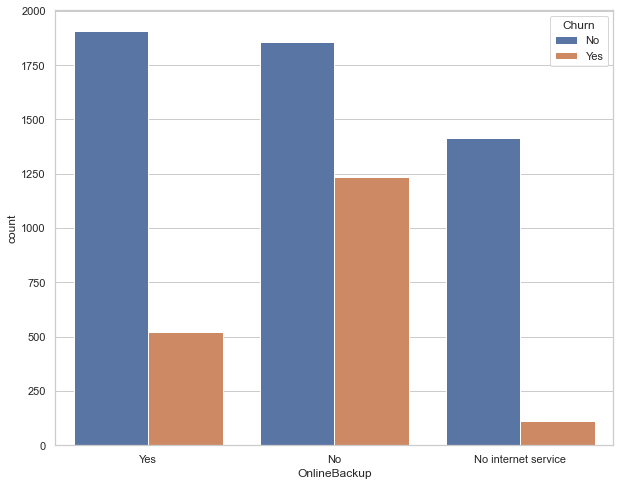

In [25]:
category_plot(dataframe, 'OnlineBackup')

In [26]:
dataframe.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

44% of clients have not activated online backup feature (high churn rate), but 35% have this feature activated.

#### DeviceProtection feature

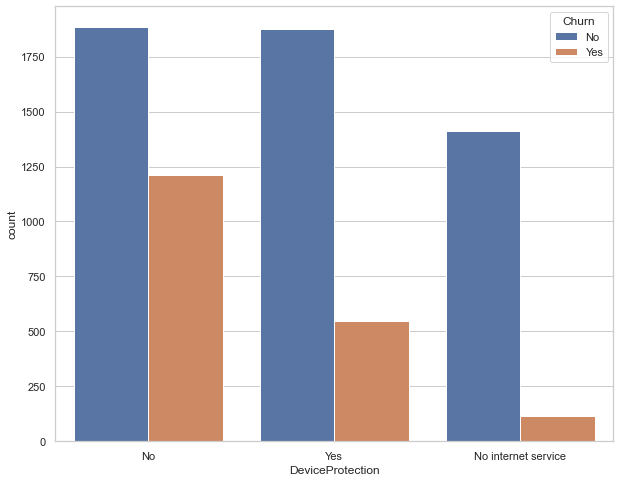

In [27]:
category_plot(dataframe, 'DeviceProtection')

In [28]:
dataframe.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

44% of clients have no device protection (high churn rate).

#### TechSupport feature

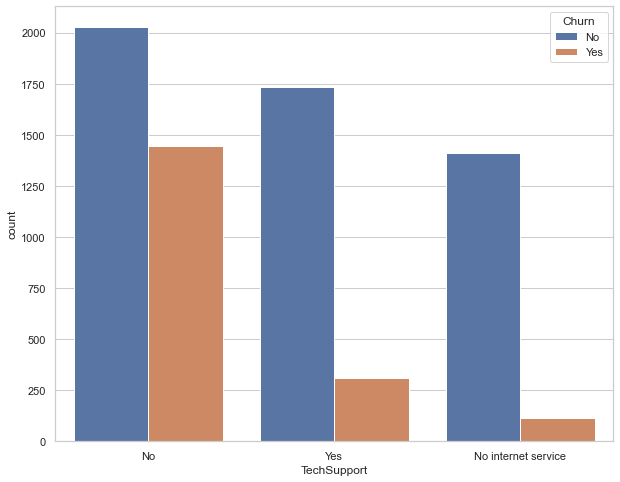

In [29]:
category_plot(dataframe, 'TechSupport')

In [30]:
dataframe.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

50% of clients did not activate tech support service (high churn rate for them).

### StreamingTV feature

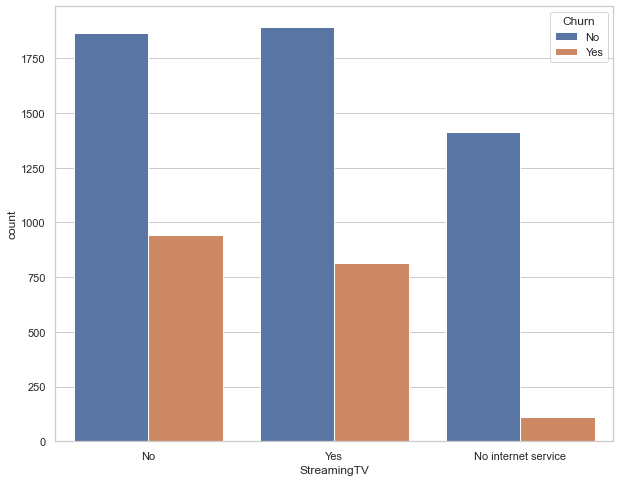

In [31]:
category_plot(dataframe, 'StreamingTV')

In [32]:
dataframe.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

Among clients with internet service activated there is 50% of them with streaming TV and 50% without (high churn rate).

#### StreamingMovies feature

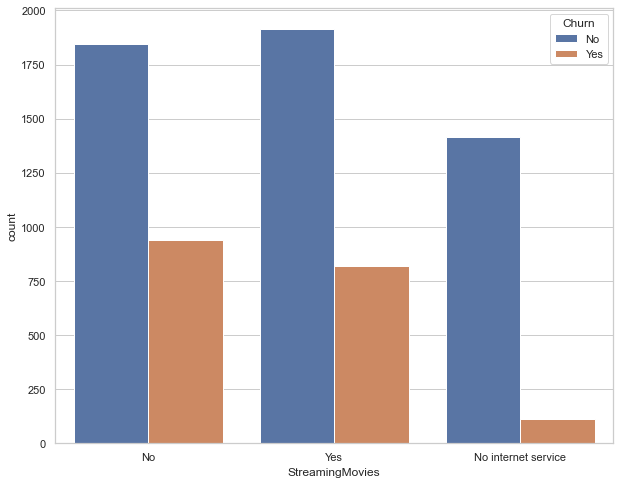

In [33]:
category_plot(dataframe, 'StreamingMovies')

In [34]:
dataframe.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Among clients with internet service activated there is 50% of them with streaming movies activated feature and 50% without.

#### Contract feature

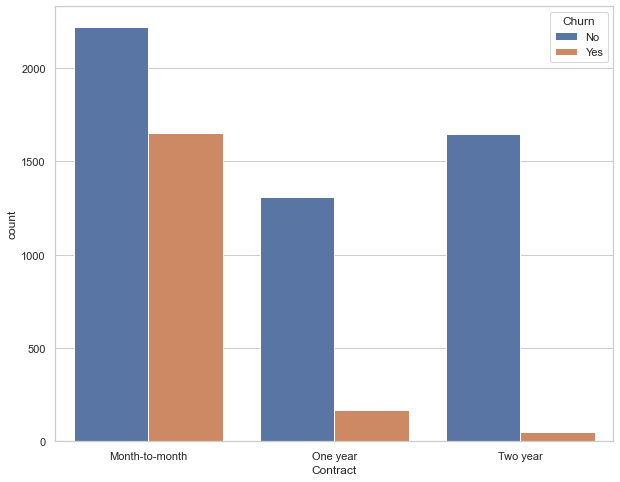

In [35]:
category_plot(dataframe, 'Contract')

In [36]:
dataframe.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

55% of clients have month-to-month contract (high churn rate).

#### PaperlessBilling feature

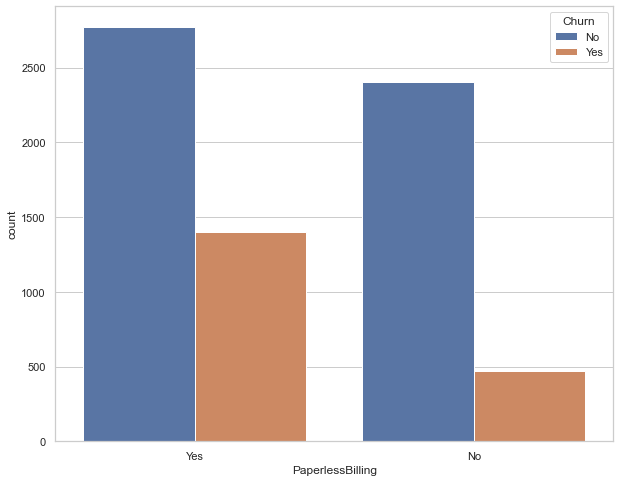

In [37]:
category_plot(dataframe, 'PaperlessBilling')

In [38]:
dataframe.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

59% of clients use paperless billing (higher churn rate).

#### PaymentMethod feature

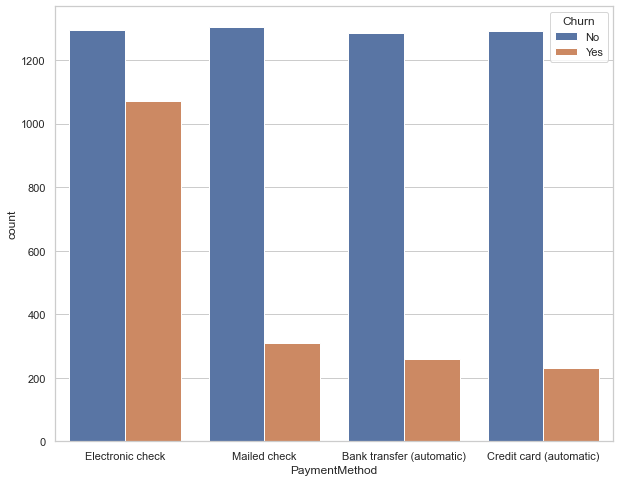

In [39]:
category_plot(dataframe, 'PaymentMethod')

In [40]:
dataframe.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

33% of clients use Electronic check as payment method (high churn rate among them).

#### MonthlyCharges feature

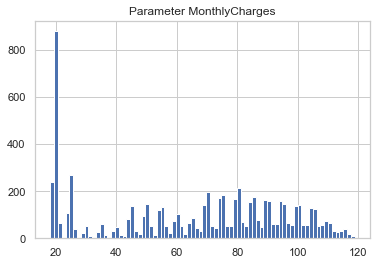

In [41]:
hist_plot(dataframe, 'MonthlyCharges', 80)

In [42]:
dataframe.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [43]:
dataframe.MonthlyCharges.mode()

0    20.05
dtype: float64

As could be seen from distribution, we presume this is bimodal with pronounced main mode at 20.05.

#### TotalCharges feature

In [44]:
type(dataframe.iloc[0, -2])  # values in TotalCharges as of 'str' type

str

Column TotalCharges with values of type 'str. There are absent values in this column: `' '`

In [45]:
dataframe.replace(' ', np.nan, inplace=True)
dataframe.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Remove nan values (rows) from the whole dataset: there are only 10 of them, which is 0.16% of the total rows - this will not impact on result.

In [46]:
dataframe.dropna(inplace=True)
dataframe.shape

(7032, 20)

In [47]:
dataframe['TotalCharges'] = dataframe['TotalCharges'].astype(float) 

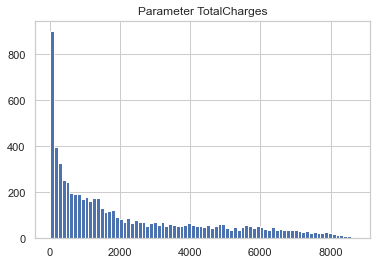

In [48]:
hist_plot(dataframe, 'TotalCharges', 80)

In [49]:
dataframe.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

There is a unimodal distribution with positive coefficient of skewness and positive coefficient of kurtosis. A lot of clients has low sum of payment over all time.

#### Target value Churn

In [50]:
dataframe.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

36% of cluents have churn. important to note that dataset is not balanced.

# 2. Investigation of dependencies and hypothesis formulation

#### Hypothesis 1: method of payment is relevant to churn

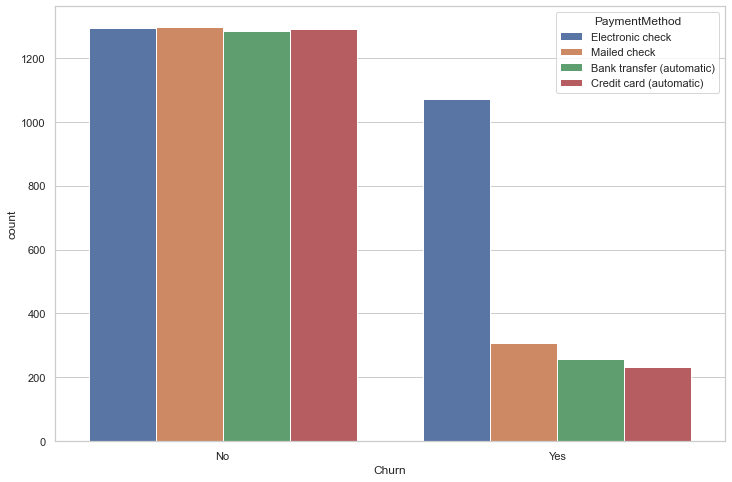

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(x='Churn', hue='PaymentMethod', data=dataframe)
plt.show()

Clients with electronic check as payment methid has high churn rate.

Let's have a look at these particular clients:

In [52]:
electronic_check = dataframe[(dataframe['PaymentMethod'] == 'Electronic check')
                            & (dataframe['Churn'] == 'Yes')]

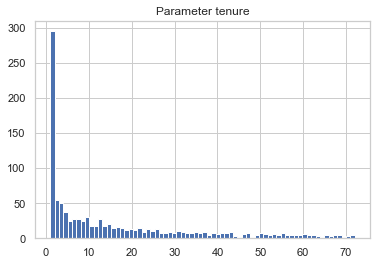

In [53]:
hist_plot(electronic_check, 'tenure', 70)

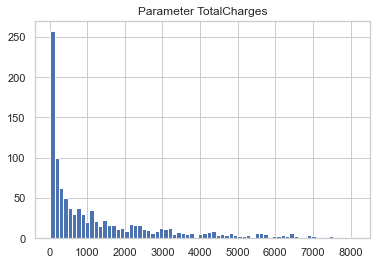

In [54]:
hist_plot(electronic_check, 'TotalCharges', 70)

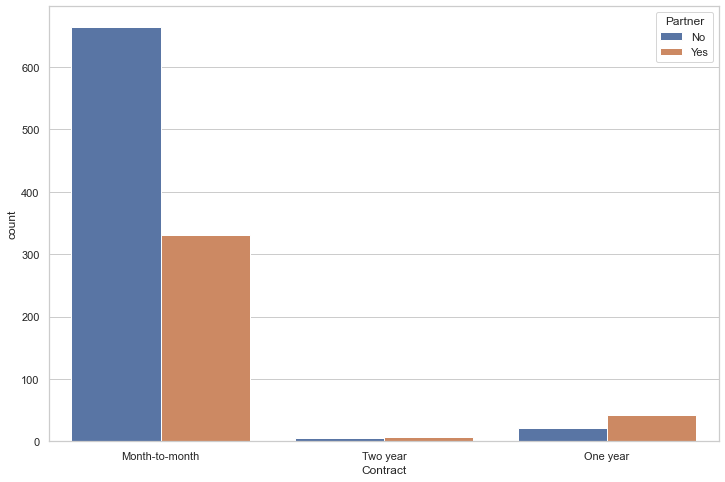

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(x='Contract', hue='Partner', data=electronic_check)
plt.show()

Proposed portrait of client for high churn rate: client with month-to-month contract, without partner, using electronic check as payment method, recently started using company services.

#### Hypothesis 2: using internet service is relevant to churn

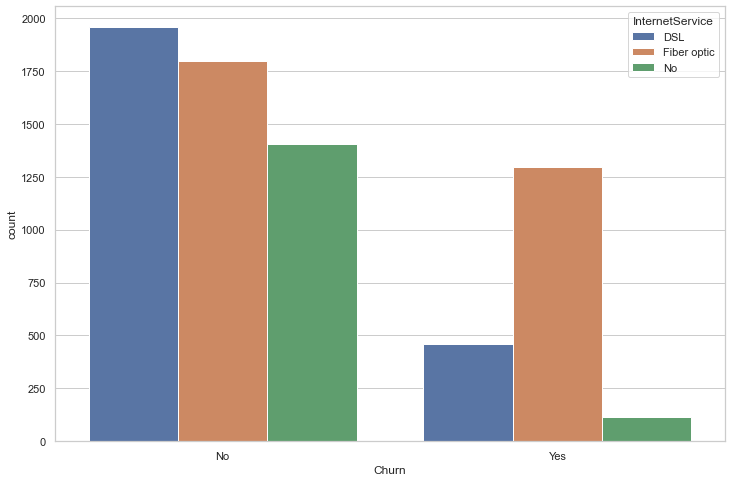

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(x='Churn', hue='InternetService', data=dataframe)
plt.show()

There is high churn rate for the clients using fiber optic internet connection

Let's consider these clients

In [57]:
optic_fiber = dataframe[(dataframe['InternetService'] == 'Fiber optic')
                        & (dataframe['Churn'] == 'Yes')]

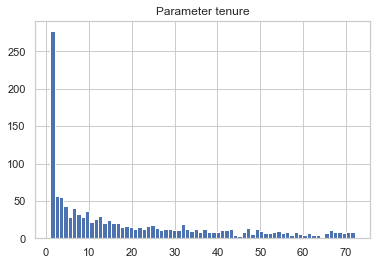

In [58]:
hist_plot(optic_fiber, 'tenure', 70)

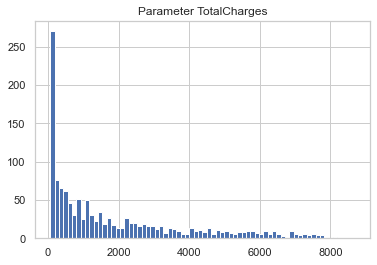

In [59]:
hist_plot(optic_fiber, 'TotalCharges', 70)

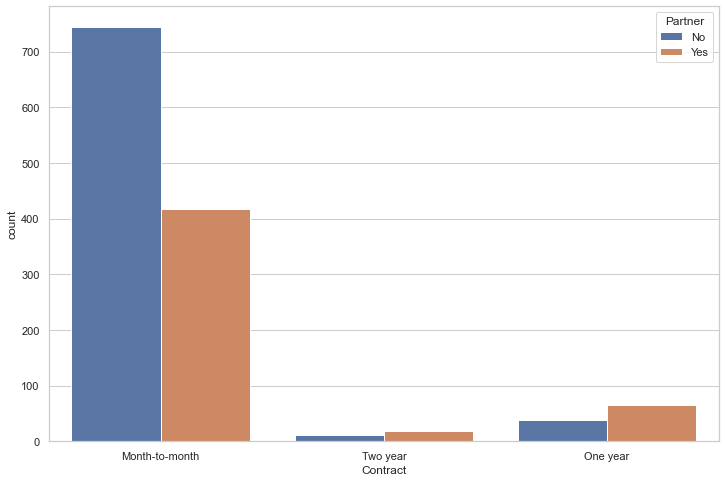

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(x='Contract', hue='Partner', data=optic_fiber)
plt.show()

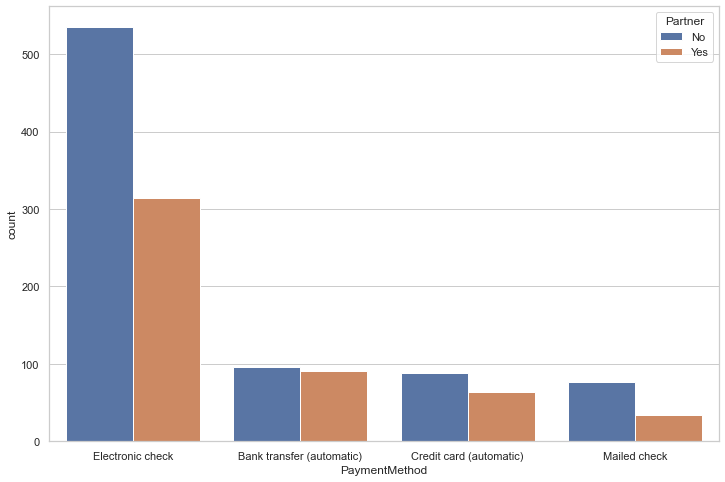

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x='PaymentMethod', hue='Partner', data=optic_fiber)
plt.show()

Proposed portrait of client for high churn rate: client with month-to-month contract, using fiber optic as internet service, without partner, using electronic check as payment method, recently started using company services.

#### Hypothesis 3: having partner is relevant to churn rate

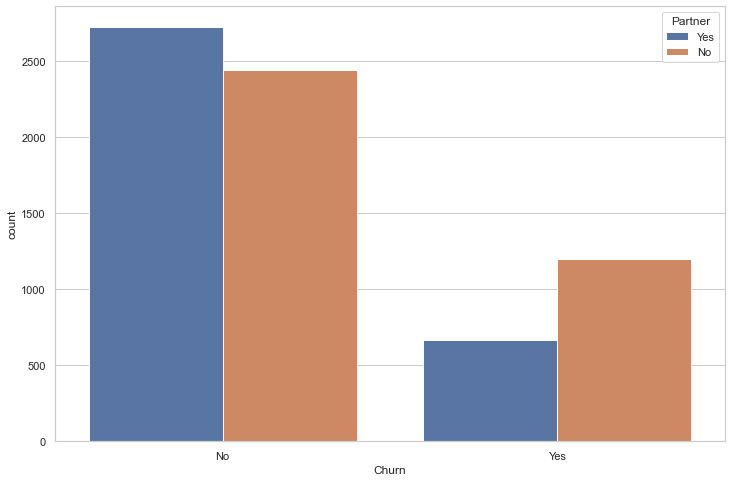

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(x='Churn', hue='Partner', data=dataframe)
plt.show()

High churn rate is typical for clients without partner

#### Hypothesis 4: Presence of the dependat is relevant to churn rate

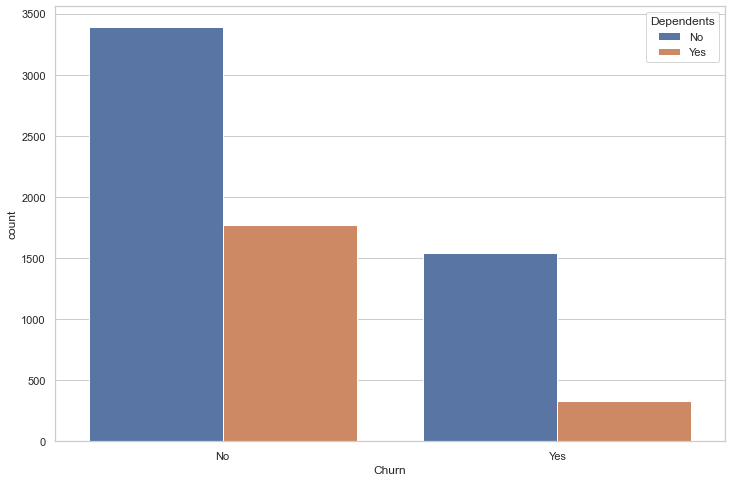

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x='Churn', hue='Dependents', data=dataframe)
plt.show()

Clients without dependants have higher churn rate

#### Hypothesis 5: is there relation between seniority of citizen and churn rate

In [64]:
senior_citizen_churn = (dataframe[dataframe['SeniorCitizen'] == 1][['Churn', 'SeniorCitizen']]
                        .reset_index(drop=True))

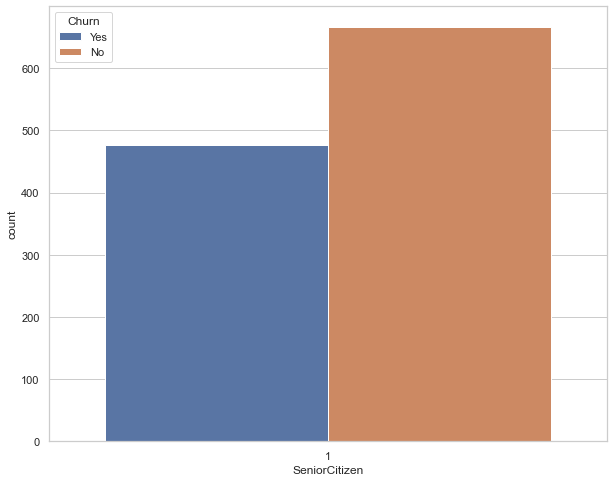

In [65]:
category_plot(senior_citizen_churn, 'SeniorCitizen')

There is lower churn rate among senior citizens

#### Hypothesis 6: there is a relation between number of months with company and churn rate

In [66]:
tenure_churn = (dataframe[dataframe['Churn'] == 'Yes'][['Churn', 'tenure']]
                .reset_index(drop=True))

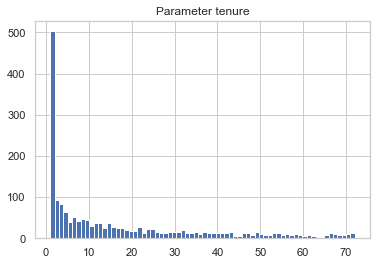

In [67]:
hist_plot(tenure_churn, 'tenure', 70)

In [68]:
tenure_not_churn = (dataframe[dataframe['Churn'] == 'No'][['Churn', 'tenure']]
                    .reset_index(drop=True))

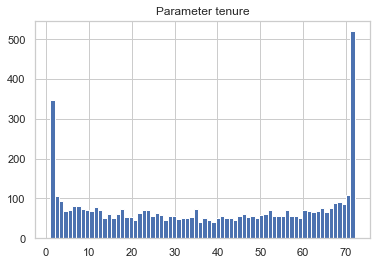

In [69]:
hist_plot(tenure_not_churn, 'tenure', 70)

It is noticeable that client who has long relationship with the company is less prone to churn. Perhaps, we could consider this metric as loyalty.

###  Feature engineering

In [70]:
dataframe['gender'] = dataframe['gender'].map({'Female': 0, 'Male': 1}).astype(int)
dataframe['Partner'] = dataframe['Partner'].map({'No': 0, 'Yes': 1}).astype(int)
dataframe['Dependents'] = dataframe['Dependents'].map({'No': 0, 'Yes': 1}).astype(int)

dataframe['tenure_с'] = pd.qcut(dataframe['tenure'], 4)
dataframe.loc[ dataframe['tenure'] <= 9.0, 'tenure']                                  = 0
dataframe.loc[(dataframe['tenure'] > 9.0) & (dataframe['tenure'] <= 29.0), 'tenure']  = 1
dataframe.loc[(dataframe['tenure'] > 29.0) & (dataframe['tenure'] <= 56.0), 'tenure'] = 2
dataframe.loc[ dataframe['tenure'] > 56.0, 'tenure']                                  = 3
dataframe['tenure'] = dataframe['tenure'].astype(int)
dataframe = dataframe.drop(columns=['tenure_с'], axis=1)

dataframe['PhoneService'] = dataframe['PhoneService'].map({'No': 0, 'Yes': 1}).astype(int)
dataframe['MultipleLines'] = (dataframe['MultipleLines']
                              .map({'No phone service': 0, 'No': 1, 'Yes': 2})
                              .astype(int))
dataframe['InternetService'] = (dataframe['InternetService']
                                .map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
                                .astype(int))
dataframe['OnlineSecurity'] = (dataframe['OnlineSecurity']
                               .map({'No internet service': 2, 'No': 0, 'Yes': 1})
                               .astype(int))
dataframe['OnlineBackup'] = (dataframe['OnlineBackup']
                             .map({'No internet service': 2, 'No': 0, 'Yes': 1})
                             .astype(int))
dataframe['DeviceProtection'] = (dataframe['DeviceProtection']
                                 .map({'No internet service': 2, 'No': 0, 'Yes': 1})
                                 .astype(int))
dataframe['TechSupport'] = (dataframe['TechSupport']
                            .map({'No internet service': 2, 'No': 0, 'Yes': 1})
                            .astype(int))
dataframe['StreamingTV'] = (dataframe['StreamingTV']
                            .map({'No internet service': 2, 'No': 0, 'Yes': 1})
                            .astype(int))
dataframe['StreamingMovies'] = (dataframe['StreamingMovies']
                                .map({'No internet service': 2, 'No': 0, 'Yes': 1})
                                .astype(int))
dataframe['Contract'] = (dataframe['Contract']
                         .map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
                         .astype(int))
dataframe['PaperlessBilling'] = (dataframe['PaperlessBilling']
                                 .map({'No': 0, 'Yes': 1})
                                 .astype(int))

dataframe['PaymentMethod'] = dataframe['PaymentMethod'].map({
    'Electronic check': 0, 'Mailed check': 1,
    'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3, 
}).astype(int)

dataframe['MonthlyCharges_с'] = pd.qcut(dataframe['MonthlyCharges'], 4)
dataframe.loc[ dataframe['MonthlyCharges'] <= 35.65, 'MonthlyCharges'] = 0
(dataframe
 .loc[(dataframe['MonthlyCharges'] > 35.65) 
      & (dataframe['MonthlyCharges'] <= 70.4), 'MonthlyCharges']) = 1
(dataframe
 .loc[(dataframe['MonthlyCharges'] > 70.4) 
      & (dataframe['MonthlyCharges'] <= 89.9), 'MonthlyCharges']) = 2
dataframe.loc[ dataframe['MonthlyCharges'] > 89.9, 'MonthlyCharges'] = 3
dataframe['MonthlyCharges'] = dataframe['MonthlyCharges'].astype(int)
dataframe = dataframe.drop(columns=['MonthlyCharges_с'], axis=1)

dataframe['TotalCharges_c'] = pd.qcut(dataframe['TotalCharges'], 4)
dataframe.loc[ dataframe['TotalCharges'] <= 404.312, 'TotalCharges'] = 0
(dataframe
 .loc[(dataframe['TotalCharges'] > 404.312) 
      & (dataframe['TotalCharges'] <= 1412.15), 'TotalCharges']) = 1
(dataframe
 .loc[(dataframe['TotalCharges'] > 1412.15) 
      & (dataframe['TotalCharges'] <= 3846.962), 'TotalCharges']) = 2
dataframe.loc[ dataframe['TotalCharges'] > 3846.962, 'TotalCharges'] = 3
dataframe['TotalCharges'] = dataframe['TotalCharges'].astype(int)
dataframe = dataframe.drop(columns=['TotalCharges_c'], axis=1)

dataframe['Churn'] = dataframe['Churn'].map({'No': 0, 'Yes': 1}).astype(int)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

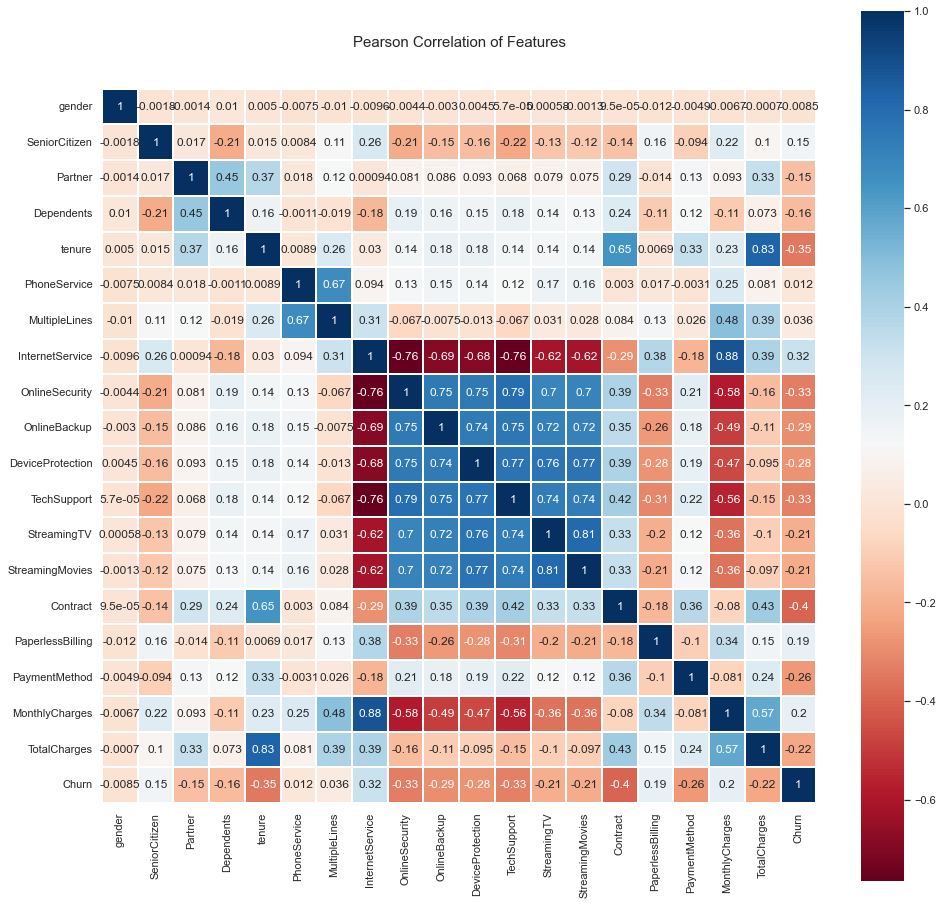

In [71]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dataframe.astype(float).corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

#### Contract feature and target value churn

There is a noticable inverse correlation of -0.4 for this feature and target value. This could be pretty logical: those who has short-term contract more prone to churn.

#### Correlation between tenure and TotalCharges

There is a strong correlation between tenure and TotalCharges features. This could be explainable as well: the more client with the company, the more charges.

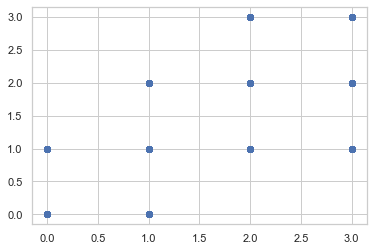

In [72]:
plt.scatter(dataframe.tenure, dataframe.TotalCharges)
plt.show()

#### Correlation between InternetService and MonthlyCharges features

It is noticable string correlation between these features (0.88). If there is a internet service activated, there is a higher costs.

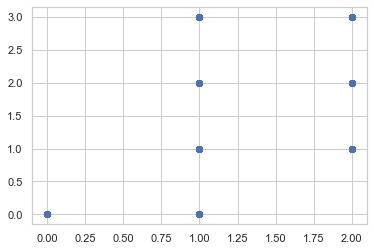

In [73]:
plt.scatter(dataframe.InternetService, dataframe.MonthlyCharges)
plt.show()

#### Correlations between internet services

Features with 8-13 indices correlates between each other in various degrees (>0.7) because clients use different internet services.

# 3. Build models and predict churn rate

### Model selection

Because data is quite diverse and number of features equal to 19 then following models has been selected:

1. RandomForestClassifier()
- fits a number of decision tree classifiers on various sub-samples of the dataset
- uses averaging to improve the predictive accuracy and control over-fitting
- handle imbalanced datasets
2. LogisticRegression()
- parameter for regularization *С*
- handle imbalanced datasets
3. C-Support Vector Classification SVC()
- parameter for regularization *С*
- handle imbalanced datasets
4. GradientBoostingClassifier()
- boosting algorithm
5. Adaptive Boosting Classifier
- boosting alorithm
6. XGBoost
- boosting algorithm with various parameters
- handle imbalanced datasets

Best models parameters will be determined by grid search and 5-fold cross-validation.

In [74]:
def find_best_param_and_predict(model_name, model, param_dict, x, y, save_model=''):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)
    model_grid = GridSearchCV(model, param_dict, cv=StratifiedKFold(n_splits=5))
    model_grid.fit(X_train, y_train)
    print(f'{model_name} model')
    print(f'Best parameters {model_grid.best_params_}')
    
    model_predict = model_grid.predict(X_test)
    
    print(f'Accuracy {accuracy_score(y_test, model_predict):.2f}')
    print(f'Precision {precision_recall_fscore_support(y_test, model_predict, average="binary")[0]:.2f}')
    print(f'Recall {precision_recall_fscore_support(y_test, model_predict, average="binary")[1]:.2f}')
    print(f'F1-score {precision_recall_fscore_support(y_test, model_predict, average="binary")[2]:.2f}')
    
    if save_model:
        pickle.dump(model_grid, open(f'{model_name}', 'wb'))
    
    return model_grid

In [75]:
target = dataframe['Churn'].values
X = dataframe.drop(columns = ['Churn'])

#### 1. Random Forest

In [99]:
rfc = RandomForestClassifier(class_weight={0:1,1:2},random_state=14)
rfc_params = {'n_estimators': range(50, 500, 100), 
              'oob_score': [True],
              'min_samples_leaf': range(1, 4), 
              'max_features': ['auto'], 
              'max_leaf_nodes': [30], 
              'n_jobs': [-1]}
rfc_model_best = find_best_param_and_predict('random-forest', rfc, rfc_params, X, target)

random-forest model
Best parameters {'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 3, 'n_estimators': 450, 'n_jobs': -1, 'oob_score': True}
Accuracy 0.79
Precision 0.56
Recall 0.76
F1-score 0.64


#### 2. Logistic Regression

In [100]:
lr = LogisticRegression(class_weight={0:1,1:2}, random_state=14)
lr_params = {'C': np.arange(0.3, 1, 0.1)}
lr_model_best = find_best_param_and_predict('logistic-regression', lr, lr_params, X, target)

logistic-regression model
Best parameters {'C': 0.5}
Accuracy 0.78
Precision 0.55
Recall 0.75
F1-score 0.64


#### 3. Support Vector Machine (SVM)

In [101]:
svc = SVC(class_weight={0:1,1:2}, random_state=14)
svc_params = {'kernel': ['linear', 'rbf'],
              'C': np.arange(0.1, 1, 0.2)}
svc_model_best = find_best_param_and_predict('SVM', svc, svc_params, X, target)

SVM model
Best parameters {'C': 0.9000000000000001, 'kernel': 'rbf'}
Accuracy 0.79
Precision 0.56
Recall 0.75
F1-score 0.64


#### 4. Gradient Boosting Classifier

In [102]:
gbc = GradientBoostingClassifier(random_state=14)
gbc_params = {'learning_rate': np.arange(0.1, 1.0, 0.1), 
              'n_estimators': np.arange(50, 150, 20), 
              'subsample': np.arange(0.4, 1.0, 0.2)}
gbc_model_best = find_best_param_and_predict('gradient-boosting', gbc, gbc_params, X, target)

gradient-boosting model
Best parameters {'learning_rate': 0.1, 'n_estimators': 90, 'subsample': 0.6000000000000001}
Accuracy 0.82
Precision 0.66
Recall 0.57
F1-score 0.61


#### 5. Adaptive Boosting Classifier

In [103]:
adc = AdaBoostClassifier(random_state=14)
adc_params = {'n_estimators': range(10, 100, 10), 
              'learning_rate': np.arange(0.1, 0.6, 0.1)}
adc_model_best = find_best_param_and_predict('ada-boost', adc, adc_params, X, target)

ada-boost model
Best parameters {'learning_rate': 0.4, 'n_estimators': 90}
Accuracy 0.82
Precision 0.67
Recall 0.54
F1-score 0.60


#### 6. XGBoosting

In [105]:
xgb = XGBClassifier(random_state=14)
xgb_params = {'n_estimators': range(10, 100, 10),
              'learning_rate': np.arange(0.1, 1.0, 0.1),
              'subsample': np.arange(0.1, 1.0, 0.2), 
              'verbosity': [0], 'scale_pos_weight': [2.76]}
xgb_model_best = find_best_param_and_predict('XGBoost', xgb, xgb_params, X, target)

XGBoost model
Best parameters {'learning_rate': 0.1, 'n_estimators': 20, 'scale_pos_weight': 2.76, 'subsample': 0.1, 'verbosity': 0}
Accuracy 0.77
Precision 0.53
Recall 0.75
F1-score 0.62


# 4. Model quality comparison

Recall has been chosen as a target metric because there is a need to minimize the risk of skipping any positive result. In other words, we would like to prevent the situation such as model predicts that there is no churn for particular client when is fact that client had churn. But we monitor accuracy as well.

It is noticable that the more accurate algorithm is RandomForestClassifier with 76% of recall and 79% of accuracy.
Second SVM has 75% of recall and 79% of accuracy.
Nevertheless, the metrics showed approximately the same values for all algorithms with applied unbalanced parameters.

# General conclusions

1. Proposed portrait of client for high churn rate: client with month-to-month contract, using fiber optic as internet service, without partner, using electronic check as payment method, recently started using company services.
2. The most accurate algorithm RandomForestClassifier has recall metric equal to 76%
3. Recall is not high, so there are some suggestions to improve this metric:
- enlarge the set of parameters for basic models using grid search, 
- use other models (KNN),
- use derivative features,
- try to use StandardScaler() for numeric features
- use stacking algorithm based on models presented in this notebook